### **Overview**

- [Section 1: Image Classification on CIFAR-100](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses](#section-2)
- [Section 3: TwoLayerNet Architecture](#section-3)
- [Section 4: ConvNet Architecture](#section-4)
- [Section 5: Preparation of Training](#section-5)
- [Section 6: Training the Networks](#section-6)
- [Section 7: Setting Up the Hyperparameters](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10](#section-9)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this project is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). We will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

We will train and test your classification system using the entire CIFAR-100 dataset. We ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

print("Data loaders for CIFAR-100 are ready for use.")

Files already downloaded and verified
Files already downloaded and verified
Data loaders for CIFAR-100 are ready for use.


<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, we implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses.


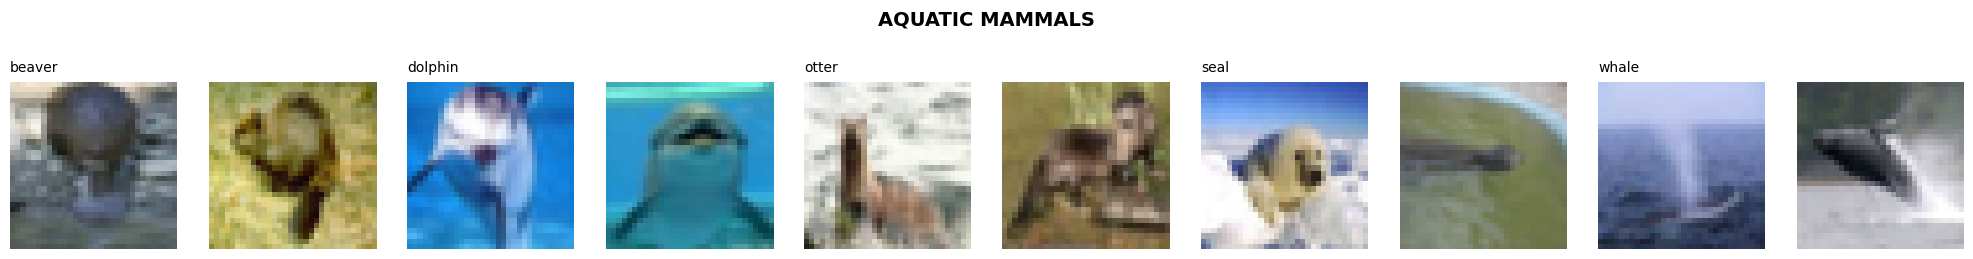

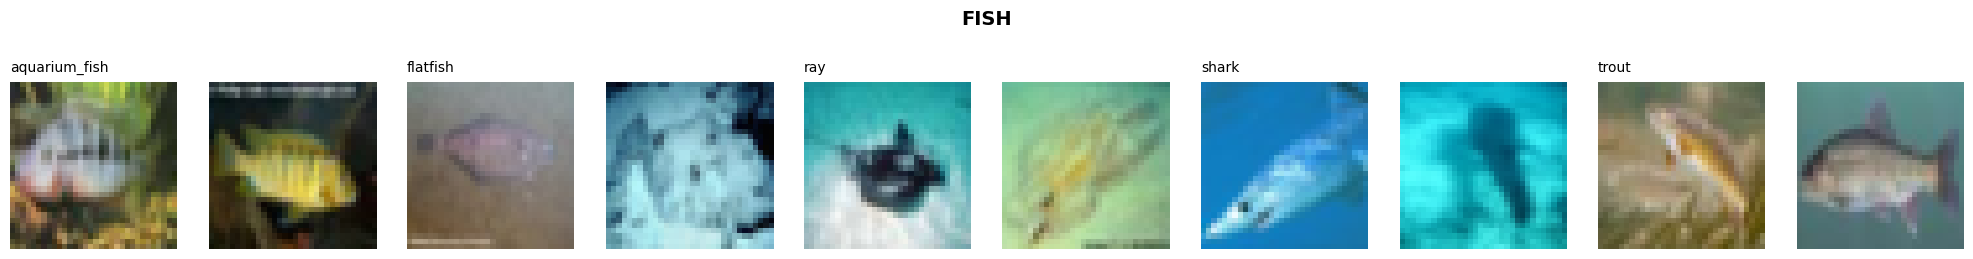

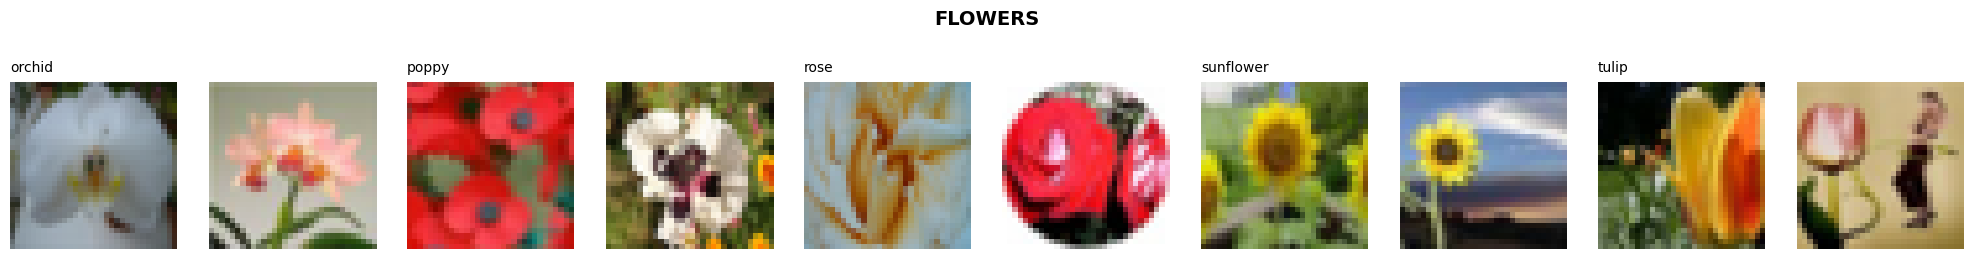

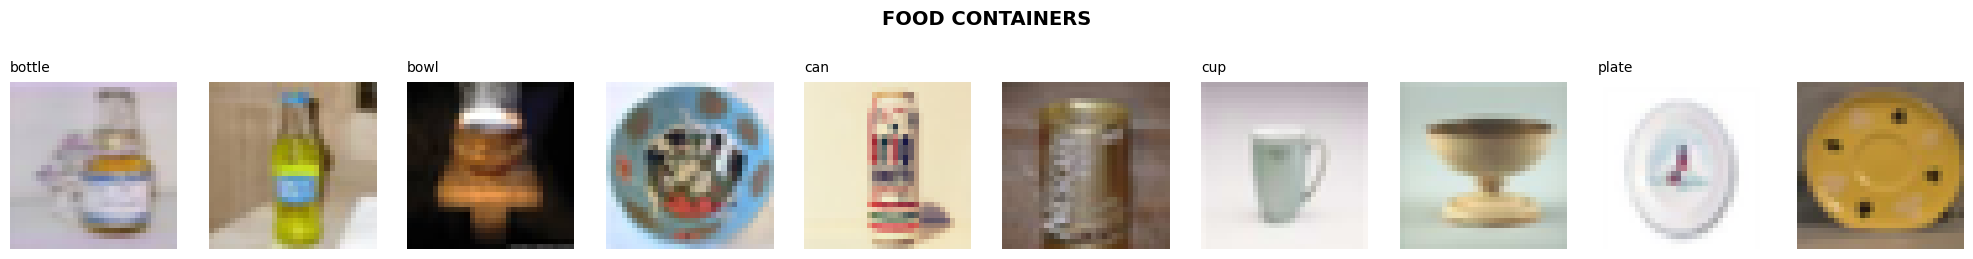

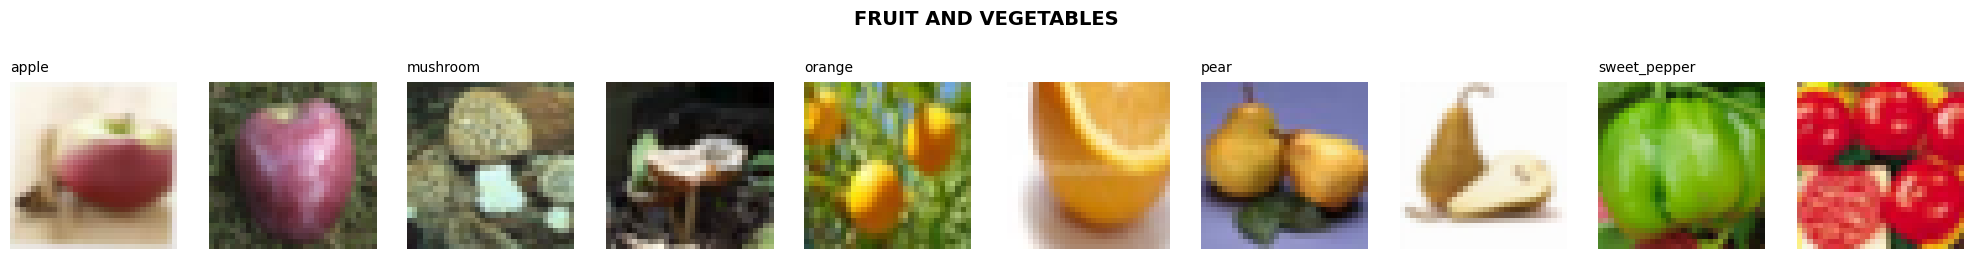

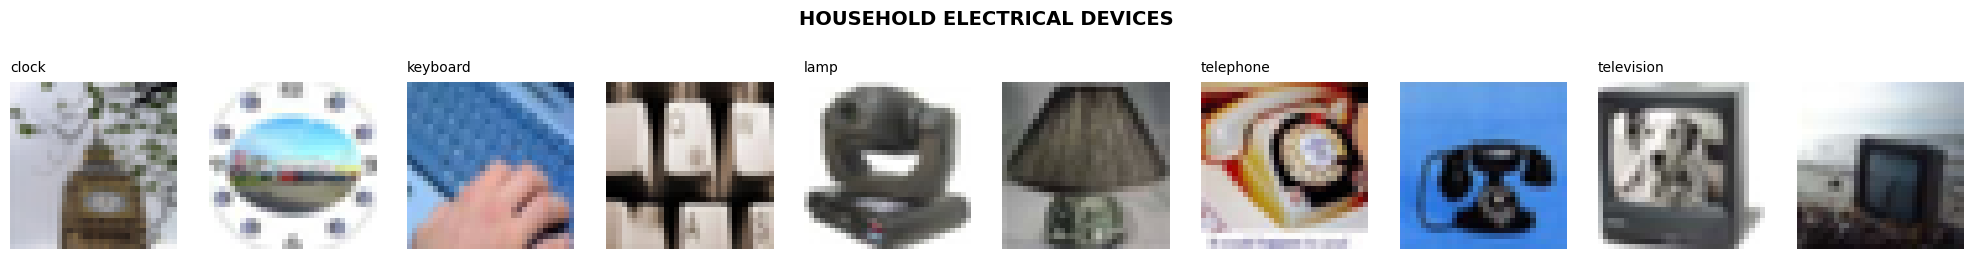

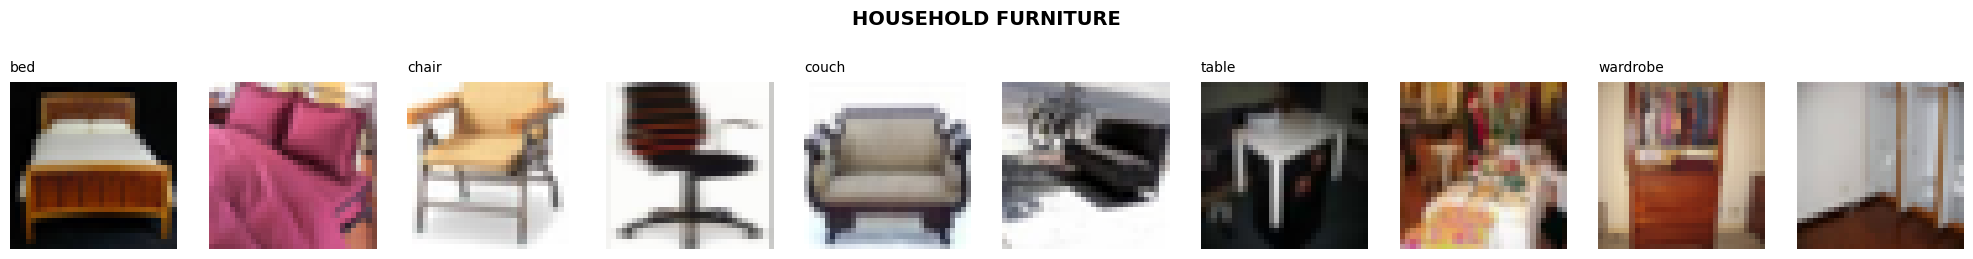

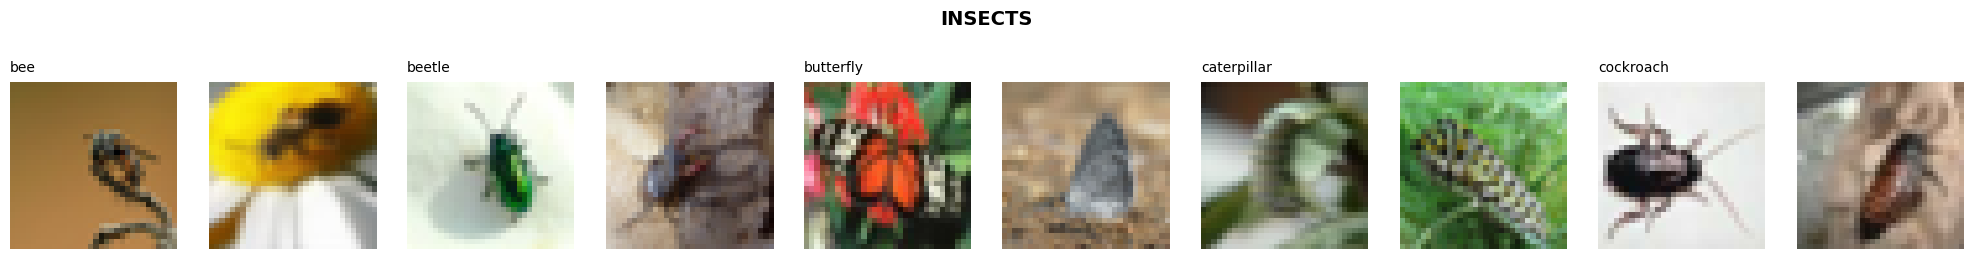

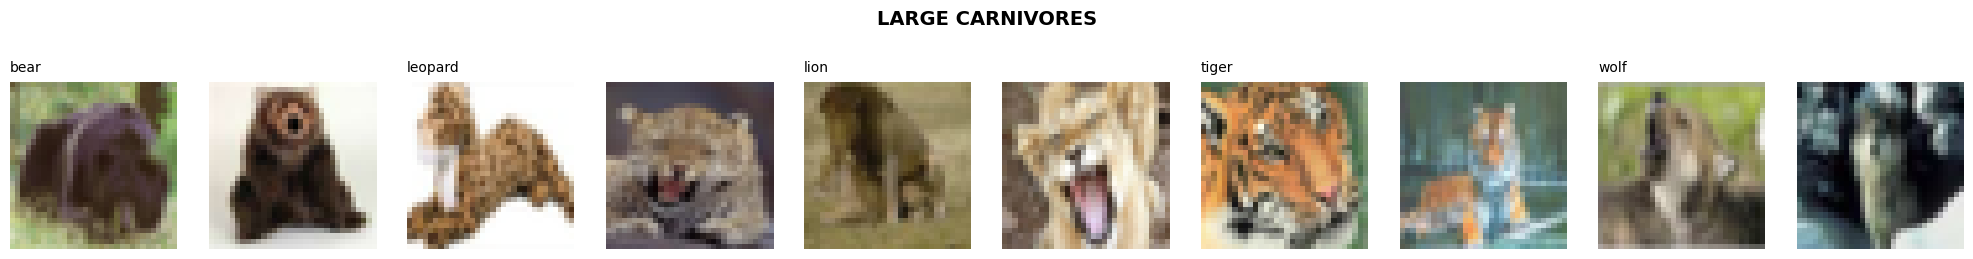

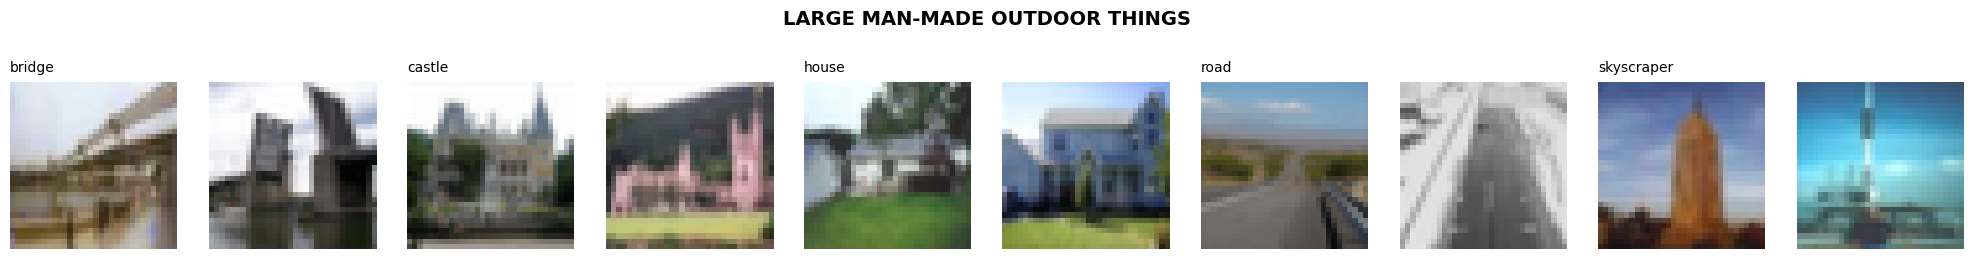

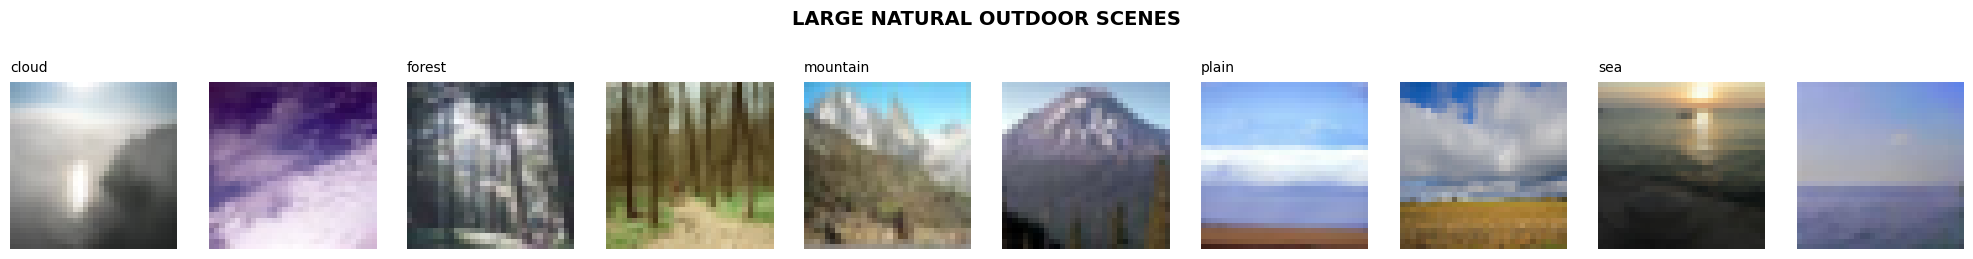

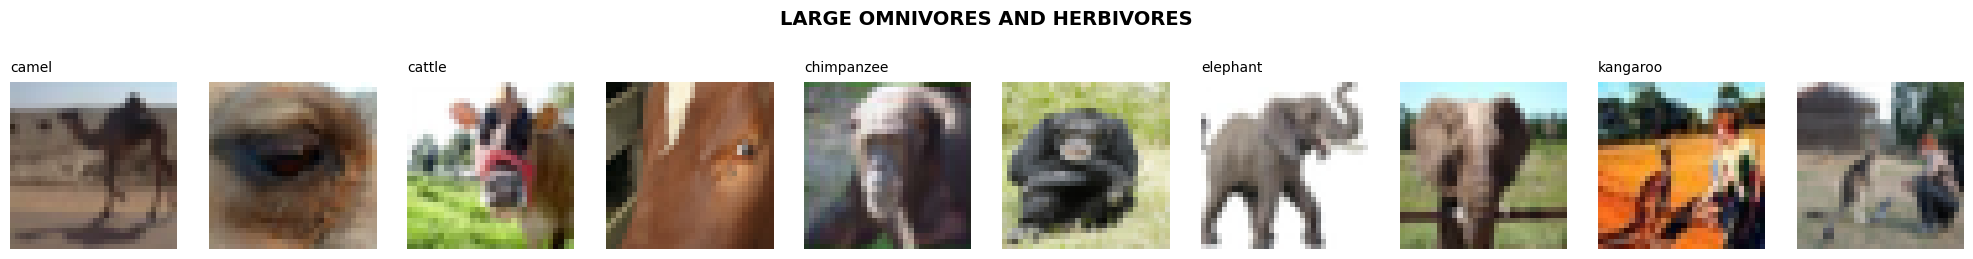

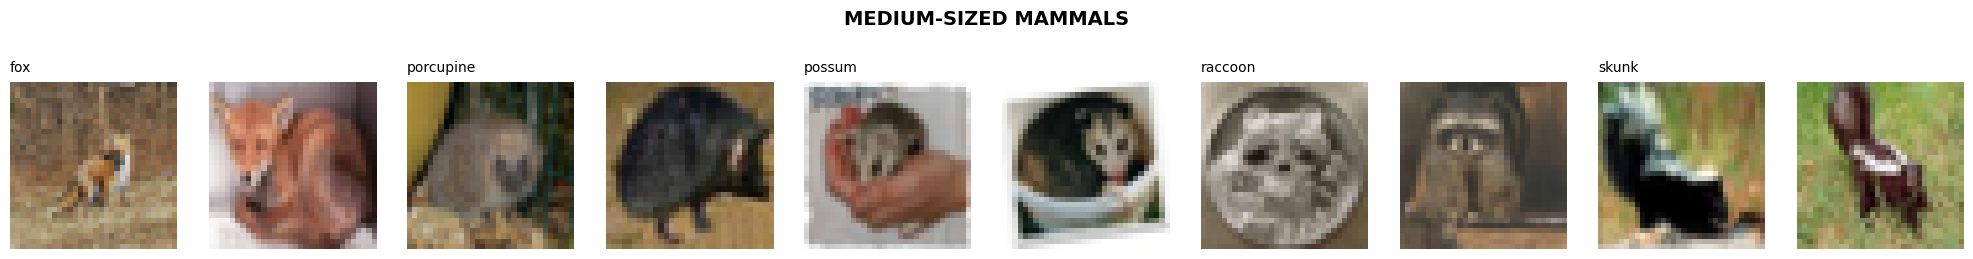

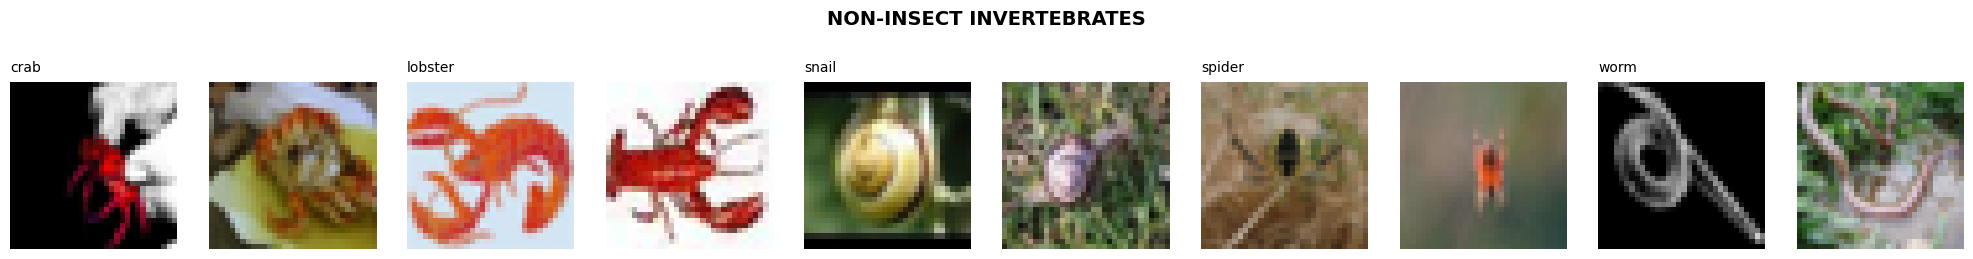

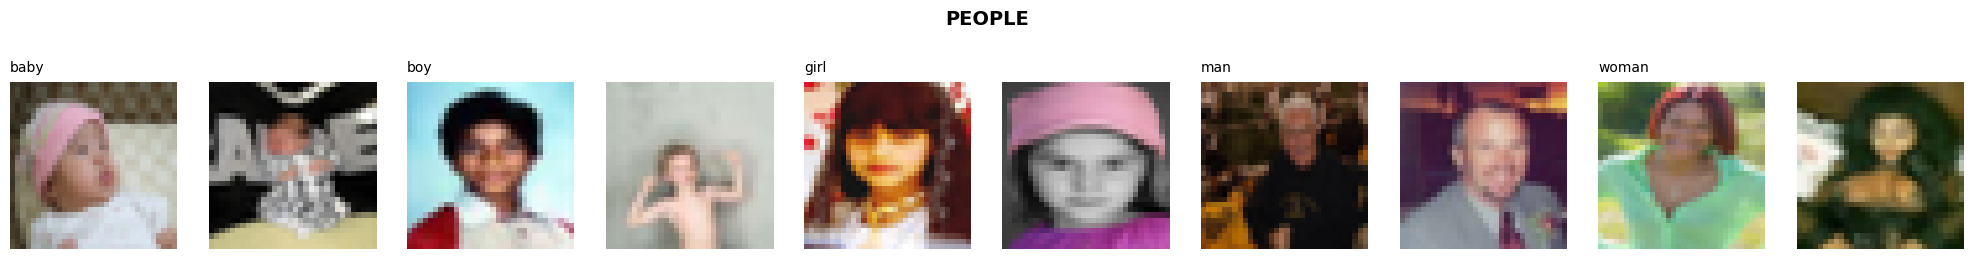

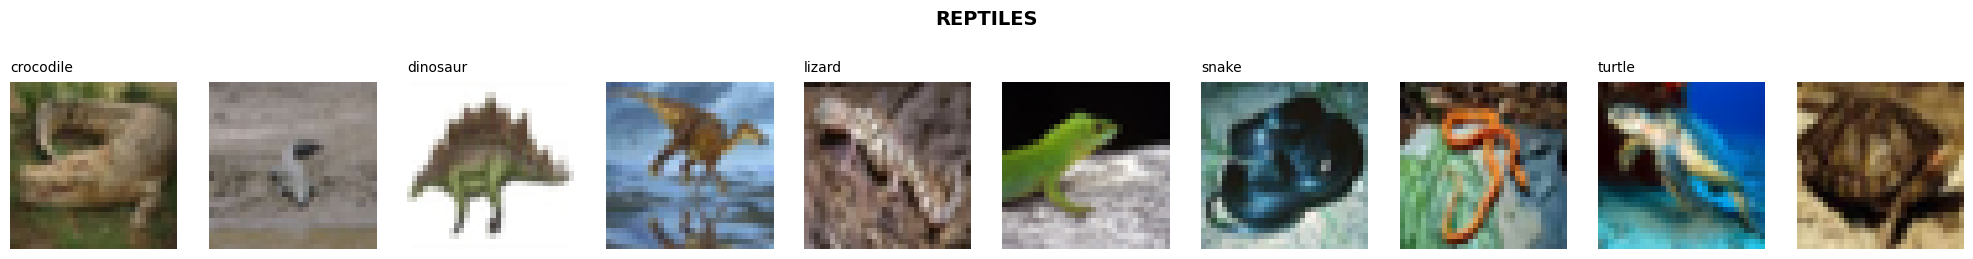

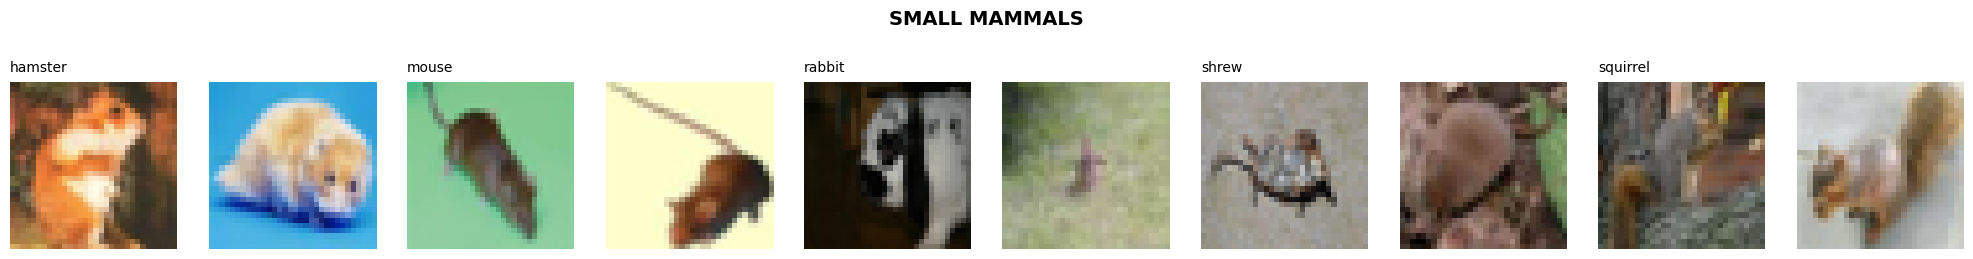

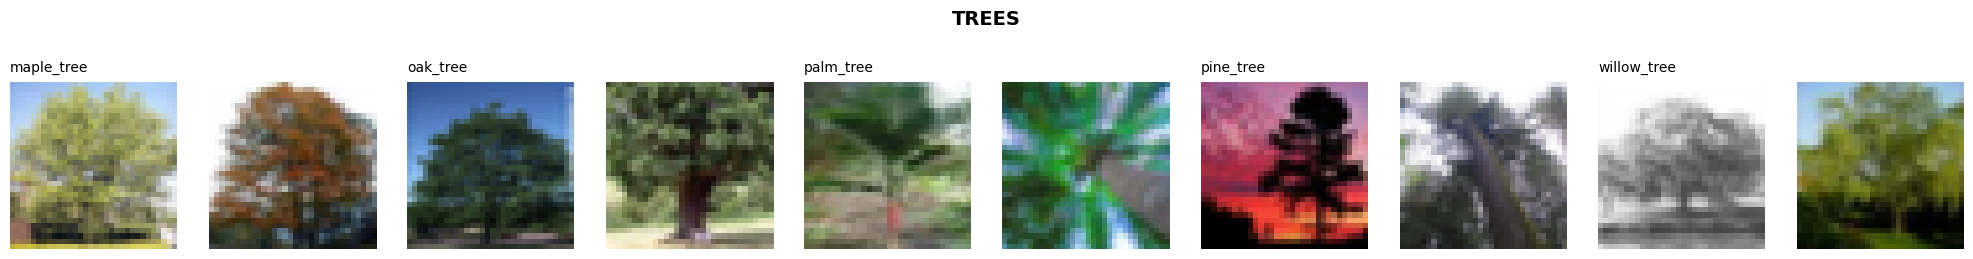

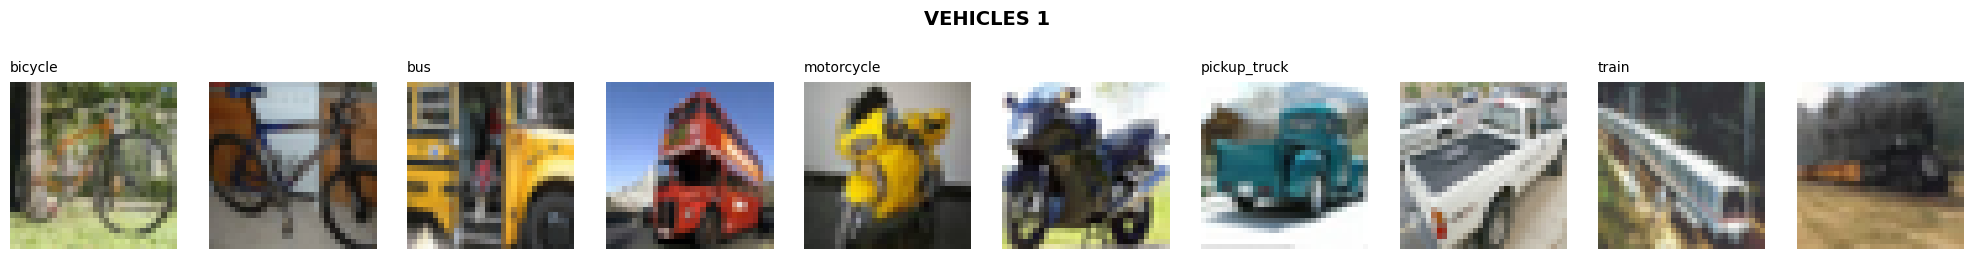

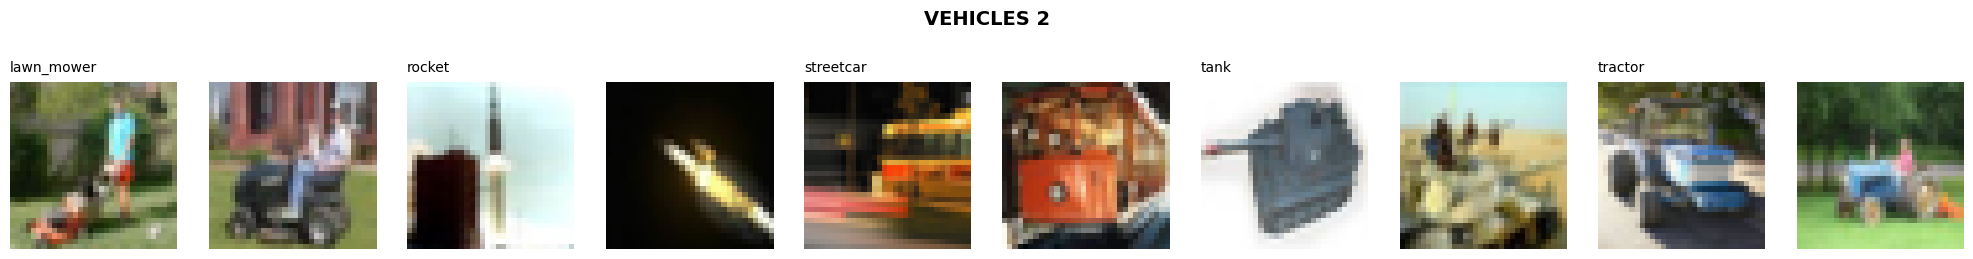

In [2]:
from collections import defaultdict

def build_index_map(dataset):
    by_class = defaultdict(list)
    for i, (_, y) in enumerate(dataset):
        by_class[y].append(i)
    return by_class

def to_show(img):
    img = img / 2 + 0.5     
    npimg = img.numpy()
    return np.transpose(npimg, (1, 2, 0))

def visualize_each_superclass(
    dataset,
    superclasses_dict,
    class_to_idx_dict,
    samples_per_subclass=2,
):
    
    by_class_idx = build_index_map(dataset)

    for super_name, subclasses_list in superclasses_dict.items():
        cols = len(subclasses_list) * samples_per_subclass
        figsize = (cols*2, 2.6)  

        fig, axes = plt.subplots(1, cols, figsize=figsize)
        if cols == 1:
            axes = [axes]  

        st = fig.suptitle(super_name.upper(), fontsize=14, fontweight='bold', y=0.98)

        # Fill images
        for c_sub, subclass in enumerate(subclasses_list):
            start = c_sub * samples_per_subclass
            end = start + samples_per_subclass

            cls_idx = class_to_idx_dict[subclass]
            chosen = by_class_idx[cls_idx][:samples_per_subclass]

            for k, col in enumerate(range(start, end)):
                ax = axes[col]
                if k < len(chosen):
                    img, _ = dataset[chosen[k]]
                    ax.imshow(to_show(img))
                ax.axis('off')

            axes[start].set_title(subclass, fontsize=10, pad=8, loc='left')

        fig.tight_layout()
        st.set_y(0.98)
        fig.subplots_adjust(top=0.70) 

        plt.show()
        plt.close(fig)


visualize_each_superclass(
    train_set,
    superclasses,
    class_to_idx,
    samples_per_subclass=2,        
)


<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, we implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. 



In [3]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU(inplace=False)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        x = x.view(x.size(0), -1)         # flatten
        h = self.relu(self.fc1(x))        # first layer + ReLU
        out = self.fc2(h)                 # second layer (logits)
        return out


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, we implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. 

In [4]:
class ConvNet(nn.Module):

    def __init__(self):
        '''	
        Initializes the convolutional neural network model.

        Args:
            None
        '''

        super(ConvNet, self).__init__()
        self.C1 = nn.Conv2d(3, 6, 5, 1)
        self.S2 = nn.AvgPool2d(2, 2) # Slightly deviates from paper
        self.C3 = nn.Conv2d(6, 16, 5, 1) # Deviates from paper
        self.S4 = nn.AvgPool2d(2, 2)
        self.C5 = nn.Conv2d(16, 120, 5, 1)
        self.F6 = nn.Linear(120, 84) # F6 layer: 120*84 + 84 = 10,164 params
        self.F7 = nn.Linear(84, 100) # Deviating from LeNet because RBF isn't implemented in pytorch


    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        A = 1.7159 # These constants are used ...
        S = 2/3    # ... for the activation functions
        x = self.C1(x)
        x = A * torch.tanh(S * x)
        x = self.S2(x)
        x = A * torch.tanh(S * x)
        x = self.C3(x)
        x = A * torch.tanh(S * x)
        x = self.S4(x)
        x = A * torch.tanh(S * x)
        x = self.C5(x)
        x = x.view(x.size(0), -1) # Flatten tensor before fully connected layers
        x = A * torch.tanh(S * x)
        x = self.F6(x)
        x = A * torch.tanh(S * x)
        logits = self.F7(x) 

        return logits


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, we create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, we often need to prepare datasets manually. Here, we implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. We  also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [5]:
import pickle 
import os
from torchvision.transforms.functional import to_pil_image

class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        if download:
            torchvision.datasets.CIFAR100(root=root, train=True, download=True)
            torchvision.datasets.CIFAR100(root=root, train=False, download=True)

        with open(os.path.join(root, 'cifar-100-python', 'meta'), 'rb') as meta: # This contains the class names
            self.meta = pickle.load(meta, encoding='latin1')

        if (train): # Read either train set or test set
            with open(os.path.join(root, 'cifar-100-python', 'train'), 'rb') as train:
                self.data = pickle.load(train, encoding='latin1')
        else:
            with open(os.path.join(root, 'cifar-100-python', 'test'), 'rb') as test:
                self.data = pickle.load(test, encoding='latin1')
                
        self.root = root
        self.transform = transform
        self.train = train

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        return len(self.data['data'])

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        img = self.data['data'][idx]
        target = self.data['fine_labels'][idx]
        img = torch.tensor(img.reshape(3, 32, 32), dtype=torch.float32)

        if (self.transform):
            img_pil = to_pil_image(img)
            img_pil = self.transform(img_pil)
            img = torch.tensor(np.array(img_pil), dtype=torch.float32)

        return img, target

In [6]:
def create_transforms():
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
    
    return transform

In [7]:
def create_optimizer(model, learning_rate=0.001):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    return torch.optim.Adam(model.parameters(), lr = learning_rate)


<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, we complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. We use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [8]:
def validate(net, testloader, device):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    '''
    
    # Set the model to evaluation mode
    net.eval()
    
    correct, total = 0, 0

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy of the network on the test images: {accuracy:.2f} %')

    return accuracy

In [9]:
def validate_per_class(net, testloader, classes, device):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        None
    '''
    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        print(f'Accuracy of {class_name:5s} : {accuracy:.2f} %')

In [10]:
def train(net, train_loader, criterion, optimizer, epochs=100, device = "cpu"):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''
        
    best_acc = 0.0
    train_losses, val_accs = [], []

    for epoch in range(epochs):
        net.train()
        epoch_loss = 0.0
        total = 0

        for x_batch, y_batch in train_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            optimizer.zero_grad()
            logits = net(x_batch)
            loss = criterion(logits, y_batch)            
            loss.backward()

            optimizer.step()

            epoch_loss += loss.item() * y_batch.size(0)
            total += y_batch.size(0)

        avg_loss = epoch_loss / total
        net.eval()
        val_acc = validate(net, test_data_loader, device)
        train_losses.append(avg_loss)
        val_accs.append(val_acc)

        if (val_acc > best_acc):
            best_acc = val_acc

        print(f'Epoch {epoch + 1}/{epochs} | train loss: {avg_loss:.4f} | val acc: {val_acc:.2f} %')
            
    print('Finished Training. Best val acc: {:.2f}%'.format(best_acc))

First, initialize the datasets and data loaders for both models.

In [11]:
dir = os.getcwd()
train_transform = create_transforms()
test_transform = create_transforms()

# Datasets
train_set = CIFAR100_loader('./data', train=True, transform=train_transform) 
test_set = CIFAR100_loader('./data', train=False, transform=test_transform)

# Initialize the dataloaders
train_data_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=0)
test_data_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=0)

Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
    
print(f"Running on backend: {device}")
two_layer_net = TwoLayerNet(input_size=32*32*3, hidden_size=512, num_classes=100).to(device)
optimizer_TwoLayerNet = create_optimizer(model=two_layer_net, learning_rate=0.001)
train(net=two_layer_net, train_loader=train_data_loader, criterion=nn.CrossEntropyLoss(), optimizer=optimizer_TwoLayerNet, epochs=30, device = device)

Running on backend: mps
Accuracy of the network on the test images: 16.45 %
Epoch 1/30 | train loss: 3.8263 | val acc: 16.45 %
Accuracy of the network on the test images: 19.27 %
Epoch 2/30 | train loss: 3.4007 | val acc: 19.27 %
Accuracy of the network on the test images: 21.12 %
Epoch 3/30 | train loss: 3.1781 | val acc: 21.12 %
Accuracy of the network on the test images: 21.86 %
Epoch 4/30 | train loss: 2.9865 | val acc: 21.86 %
Accuracy of the network on the test images: 21.71 %
Epoch 5/30 | train loss: 2.8022 | val acc: 21.71 %
Accuracy of the network on the test images: 22.50 %
Epoch 6/30 | train loss: 2.6396 | val acc: 22.50 %
Accuracy of the network on the test images: 23.05 %
Epoch 7/30 | train loss: 2.4726 | val acc: 23.05 %
Accuracy of the network on the test images: 22.85 %
Epoch 8/30 | train loss: 2.3123 | val acc: 22.85 %
Accuracy of the network on the test images: 21.61 %
Epoch 9/30 | train loss: 2.1719 | val acc: 21.61 %
Accuracy of the network on the test images: 23.51

Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [13]:
conv_net = ConvNet()
optimizer_ConvNet = create_optimizer(model=conv_net, learning_rate=0.001)
train(net=conv_net, train_loader=train_data_loader, criterion=nn.CrossEntropyLoss(), optimizer=optimizer_ConvNet, epochs=25)

Accuracy of the network on the test images: 15.65 %
Epoch 1/25 | train loss: 3.8659 | val acc: 15.65 %
Accuracy of the network on the test images: 18.43 %
Epoch 2/25 | train loss: 3.5065 | val acc: 18.43 %
Accuracy of the network on the test images: 20.88 %
Epoch 3/25 | train loss: 3.3353 | val acc: 20.88 %
Accuracy of the network on the test images: 21.41 %
Epoch 4/25 | train loss: 3.2169 | val acc: 21.41 %
Accuracy of the network on the test images: 22.99 %
Epoch 5/25 | train loss: 3.1201 | val acc: 22.99 %
Accuracy of the network on the test images: 23.24 %
Epoch 6/25 | train loss: 3.0411 | val acc: 23.24 %
Accuracy of the network on the test images: 23.86 %
Epoch 7/25 | train loss: 2.9692 | val acc: 23.86 %
Accuracy of the network on the test images: 24.22 %
Epoch 8/25 | train loss: 2.9092 | val acc: 24.22 %
Accuracy of the network on the test images: 24.17 %
Epoch 9/25 | train loss: 2.8540 | val acc: 24.17 %
Accuracy of the network on the test images: 24.19 %
Epoch 10/25 | train l

<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, we experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. 

Steps taken:


1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. We played with the size and placement of these layers. Then evaluated if these changes result in higher performance and explain your findings.
3. We show the final results and describe the modifications made to enhance performance. We also discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.

In [14]:
class FourLayerNet(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, num_classes):
        '''
        Initializes a four-layer fully-connected neural network.
        We add two more hidden layers and Dropout for regularization.
        '''
        super(FourLayerNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3) # dropout to prevent overfitting
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(hidden_size2, hidden_size3)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(hidden_size3, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.relu(out)
        out = self.dropout3(out)
        out = self.fc4(out)
        return out

In [15]:
class ImprovedConvNet(nn.Module):
    def __init__(self):
        '''	
        Initializes a modified convolutional neural network model adding two layers to the baseline:
        1.  One additional convolutional layer (as part of conv_block3)
        2.  One additional fully-connected layer as part of (fc_block)
        
        we also experiment with and use ReLU, BatchNorm, MaxPool, and Dropout.
        '''
        super(ImprovedConvNet, self).__init__()
        # input: 3x32x32
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),   # [N, 3, 32, 32] -> [N, 32, 32, 32]
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),  # [N, 32, 32, 32] -> [N, 64, 32, 32]
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)         # [N, 64, 32, 32] -> [N, 64, 16, 16]
        )
        
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # [N, 64, 16, 16] -> [N, 128, 16, 16]
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)         # [N, 128, 16, 16] -> [N, 128, 8, 8]
        )
        
        # first additional layer
        self.conv_block3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # [N, 128, 8, 8] -> [N, 256, 8, 8]
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)          # [N, 256, 8, 8] -> [N, 256, 4, 4]
        )
        
        # classifier fc layer
        self.fc_block = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 512), 
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(512, 256), # second additional layer
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, 100)
        )

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.fc_block(x)
        return x

In [38]:
# training function that returns history for plotting
def train_and_plot(net, train_loader, test_loader, criterion, optimizer, scheduler=None, epochs=50):
    if torch.cuda.is_available():
        device = torch.device("cuda")
    elif torch.backends.mps.is_available():
        device = torch.device("mps")
    else:
        device = torch.device("cpu")
    
    net.to(device)
    
    history = {'train_loss': [], 'val_acc': []}
    best_acc = 0.0

    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        val_acc = validate(net, test_loader, device)
        
        history['train_loss'].append(epoch_loss)
        history['val_acc'].append(val_acc)
        
        if scheduler:
            scheduler.step()

        if val_acc > best_acc:
            best_acc = val_acc
            # save the best model
            # torch.save(net.state_dict(), f'{net.__class__.__name__}_best_stl10.pth')

        print(f'Epoch {epoch + 1}/{epochs} | Train Loss: {epoch_loss:.4f} | Val Acc: {val_acc:.2f}%')
        
    print(f'Finished Training. Best Val Acc: {best_acc:.2f}%')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(history['train_loss'])
    ax1.set_title('Training Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    
    ax2.plot(history['val_acc'])
    ax2.set_title('Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    plt.show()
    
    return history

In [17]:
# data augmentations for the training set
train_transform_augmented = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)) # CIFAR-100 specific stats - mean & std
])

# no augmentation on the test
test_transform_no_aug = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761))
])

# re-create datasets and dataloaders with new transforms
train_set_aug = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=train_transform_augmented)
test_set_no_aug = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=test_transform_no_aug)

train_loader_aug = DataLoader(train_set_aug, batch_size=128, shuffle=True, num_workers=2)
test_loader_no_aug = DataLoader(test_set_no_aug, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


Accuracy of the network on the test images: 9.39 %
Epoch 1/50 | Train Loss: 4.1787 | Val Acc: 9.39%
Accuracy of the network on the test images: 11.45 %
Epoch 2/50 | Train Loss: 3.9527 | Val Acc: 11.45%
Accuracy of the network on the test images: 11.52 %
Epoch 3/50 | Train Loss: 3.8818 | Val Acc: 11.52%
Accuracy of the network on the test images: 12.39 %
Epoch 4/50 | Train Loss: 3.8358 | Val Acc: 12.39%
Accuracy of the network on the test images: 13.07 %
Epoch 5/50 | Train Loss: 3.8165 | Val Acc: 13.07%
Accuracy of the network on the test images: 14.09 %
Epoch 6/50 | Train Loss: 3.7987 | Val Acc: 14.09%
Accuracy of the network on the test images: 13.04 %
Epoch 7/50 | Train Loss: 3.7768 | Val Acc: 13.04%
Accuracy of the network on the test images: 14.06 %
Epoch 8/50 | Train Loss: 3.7566 | Val Acc: 14.06%
Accuracy of the network on the test images: 13.29 %
Epoch 9/50 | Train Loss: 3.7433 | Val Acc: 13.29%
Accuracy of the network on the test images: 14.19 %
Epoch 10/50 | Train Loss: 3.7404

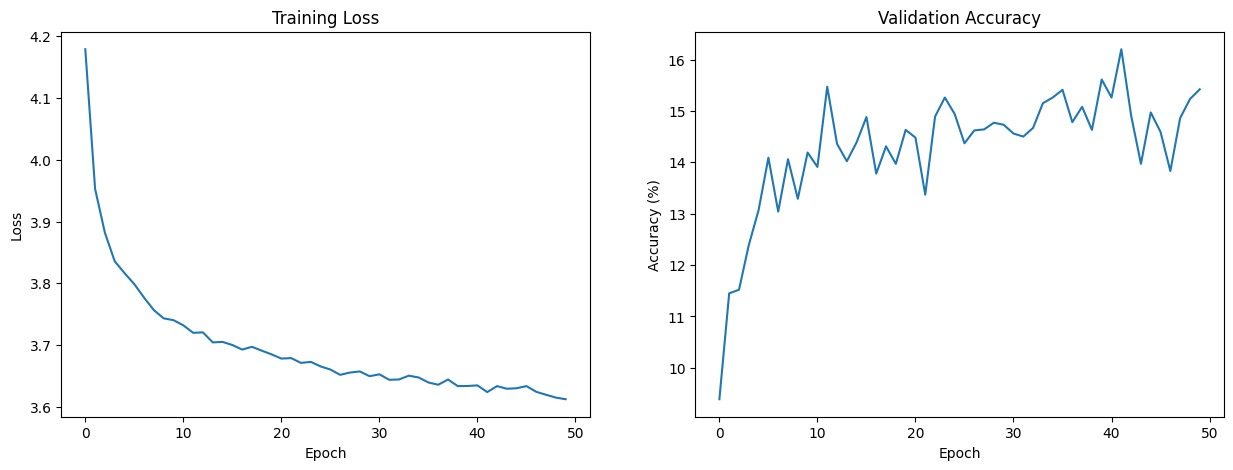

In [22]:
# training the fourLayerNet
four_layer_net = FourLayerNet(input_size=32*32*3, hidden_size1=1024, hidden_size2=512, hidden_size3=256, num_classes=100)

learning_rate = 0.001
epochs = 50
weight_decay = 1e-4

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(four_layer_net.parameters(), lr=learning_rate, weight_decay=weight_decay)
history_4layer = train_and_plot(four_layer_net, train_loader_aug, test_loader_no_aug, criterion, optimizer, epochs=epochs)

#### Tuning the FourLayerNet
To improve upon the baseline `TwoLayerNet`, we implemented a `FourLayerNet` with two additional hidden layers (`Input -> 1024 -> 512 -> 256 -> Output`). We also tried the following:
*   **Hidden Layer Sizes:** We settled on `1024 -> 512 -> 256` as it provided enough capacity without being too large.
*   **Learning Rate:** Tried learning rates of `0.0001`, `0.001`, and `0.01` with the Adam optimizer. `0.001` provided the most stable, convergence though it was slow. 
*   **Regularization:** We also tested dropout probabilities of `0.3` and `0.5`, with weight decay values of `1e-4`. A combination of `p=0.3` Dropout and `1e-4` weight decay was chosen.
*   **Data Augmentation:** The training set was also augmented with `RandomCrop` and `RandomHorizontalFlip` to increase data variance and improve generalization.

**Conclusion:** Despite these adjustments, the `FourLayerNet`'s validation accuracy failed to surpass even 17%. This poor performance confirmed its architectural weakness for image data (lack of spatial inductive bias). We decided that extensive tuning was not a productive use of resources and focused our main efforts on the `ImprovedConvNet`.

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

Accuracy of the network on the test images: 11.08 %
Epoch 1/100 | Train Loss: 4.1930 | Val Acc: 11.08%
Accuracy of the network on the test images: 17.26 %
Epoch 2/100 | Train Loss: 3.7254 | Val Acc: 17.26%
Accuracy of the network on the test images: 22.31 %
Epoch 3/100 | Train Loss: 3.4534 | Val Acc: 22.31%
Accuracy of the network on the test images: 26.77 %
Epoch 4/100 | Train Loss: 3.2391 | Val Acc: 26.77%
Accuracy of the network on the test images: 26.84 %
Epoch 5/100 | Train Loss: 3.0682 | Val Acc: 26.84%
Accuracy of the network on the test images: 30.72 %
Epoch 6/100 | Train Loss: 2.9234 | Val Acc: 30.72%
Accuracy of the network on the test images: 35.98 %
Epoch 7/100 | Train Loss: 2.8069 | Val Acc: 35.98%
Accuracy of the network on the test images: 36.92 %
Epoch 8/100 | Train Loss: 2.7118 | Val Acc: 36.92%
Accuracy of the network on the test images: 39.83 %
Epoch 9/100 | Train Loss: 2.6245 | Val Acc: 39.83%
Accuracy of the network on the test images: 42.48 %
Epoch 10/100 | Train 

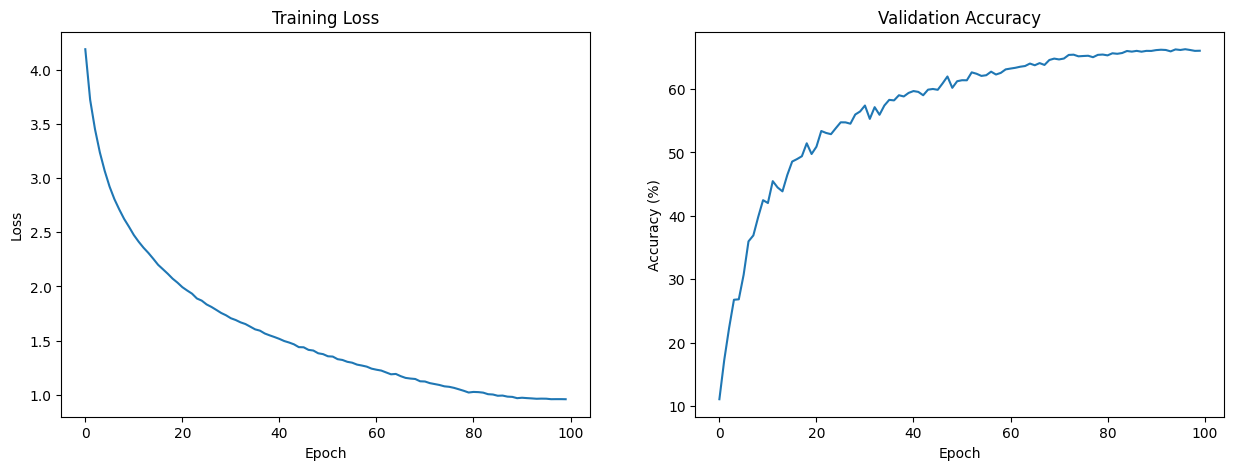

In [23]:
improved_conv_net = ImprovedConvNet()

learning_rate = 0.01
epochs = 100 # switch back to 50
weight_decay = 5e-4

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(improved_conv_net.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)
# CosineAnnealingLR to decrease LR over time
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)

history_convnet = train_and_plot(improved_conv_net, train_loader_aug, test_loader_no_aug, criterion, optimizer, scheduler=scheduler, epochs=epochs)

# ImprovedConvNet with only 1 additional layer: Best Val Acc: 59.15% (75 epochs still increasing -> todo: train for longer)

# ImprovedConvNetV2 with 2 additional layers run now: 50 epochs: best val acc 62.05. The training loss (1.4246) is still quite high. 
# trying for 100 epochs: Finished Training. Best Val Acc: 66.51%


In [24]:
torch.save(improved_conv_net.state_dict(), "improved_conv_net_100epochs.pth")

In [26]:
# Ensure the device is set
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

improved_conv_net.to(device)
improved_conv_net.eval()


final_cifar100_accuracy = validate(improved_conv_net, test_loader_no_aug, device)
print(f"Accuracy of the ImprovedConvNet on the CIFAR-100 test set is: {final_cifar100_accuracy:.2f}%")

Accuracy of the network on the test images: 66.05 %
Accuracy of the ImprovedConvNet on the CIFAR-100 test set is: 66.05%


In [28]:
validate_per_class(improved_conv_net, test_loader_no_aug, classes, device)

Accuracy of apple : 87.00 %
Accuracy of aquarium_fish : 81.00 %
Accuracy of baby  : 59.00 %
Accuracy of bear  : 40.00 %
Accuracy of beaver : 49.00 %
Accuracy of bed   : 68.00 %
Accuracy of bee   : 79.00 %
Accuracy of beetle : 66.00 %
Accuracy of bicycle : 78.00 %
Accuracy of bottle : 78.00 %
Accuracy of bowl  : 42.00 %
Accuracy of boy   : 49.00 %
Accuracy of bridge : 71.00 %
Accuracy of bus   : 54.00 %
Accuracy of butterfly : 60.00 %
Accuracy of camel : 72.00 %
Accuracy of can   : 73.00 %
Accuracy of castle : 85.00 %
Accuracy of caterpillar : 67.00 %
Accuracy of cattle : 64.00 %
Accuracy of chair : 85.00 %
Accuracy of chimpanzee : 82.00 %
Accuracy of clock : 60.00 %
Accuracy of cloud : 76.00 %
Accuracy of cockroach : 75.00 %
Accuracy of couch : 53.00 %
Accuracy of crab  : 69.00 %
Accuracy of crocodile : 53.00 %
Accuracy of cup   : 78.00 %
Accuracy of dinosaur : 61.00 %
Accuracy of dolphin : 58.00 %
Accuracy of elephant : 64.00 %
Accuracy of flatfish : 55.00 %
Accuracy of forest : 62.00

#### Analysis of`ImprovedConvNet`

**1. Modifications and Hyperparameter Tuning:**
The baseline `ConvNet` was upgraded to an improved structure by making the following changes:
*   **Architecture:** The network was deepened by adding one convolutional block and a fully-connected layer. We added batch normalization after each convolution to stabilise training and the existing tanh activations we replace with standard ReLU. Dropout (p=0.5) was added to the fully-connected layers for regularization.
*   **Training Strategy:** We used a different training strategy, switching to an **SGD optimizer with momentum (0.9)** and using a **`CosineAnnealingLR` scheduler**. This allowed for a higher initial learning rate (0.01) for faster convergence, which then gradually decreases helping in finetuning the weights effectively.

**2. Performance Analysis and Comparison:**
The `ImprovedConvNet` achieved a best validation accuracy of **66.29%** and an accuracy of **66.05%** on the CIFAR-100 test set. This is a significant improvement over all other models: the baseline `ConvNet` (approx 25%) and the `FourLayerNet` (approx 15%).


Unlike the `FourLayerNet`, the `ImprovedConvNet`'s convolutional structure has the correct **spatial inductive bias** for images which makes it learn the heirarchy of the visual features. The leap from 25% to 66% shows that a good architecture must be paired with a robust training strategy. Batch Normalization was essential for stable training of the deeper network, while the combination of data augmentation, SGD with momentum, and learning rate scheduling was crucial for navigating the loss landscape and preventing overfitting. The healthy learning curves with decreasing loss and increasing validation accuracy confirm that the model learned generalizable features.

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, we work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning our ConvNet on this dataset, we first write the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [29]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''
    # load the STL-10 training dataset without any transformations to see the original images
    stl10_dataset = torchvision.datasets.STL10(root='./data', split='train', download=True)
    class_indices = {class_idx: [] for class_idx in class_mapping.keys()}

    # iterate through the dataset to find images of our target classes
    for i, (_, label) in enumerate(stl10_dataset):
        if label in class_mapping.keys():
            # Store the index if the class is one we want to visualize
            class_indices[label].append(i)

    # setup the plot
    num_classes = len(class_mapping)
    samples_per_class = 5
    fig, axes = plt.subplots(num_classes, samples_per_class, figsize=(12, 10))
    fig.suptitle('Sample Images from STL-10 Dataset', fontsize=16, y=1.02)

    # plot the images
    for i, (class_idx, class_name) in enumerate(class_mapping.items()):
        # get the first 5 image indices for the current class
        indices_to_show = class_indices[class_idx][:samples_per_class]
        
        for j, img_idx in enumerate(indices_to_show):
            # get the image from the dataset
            img, _ = stl10_dataset[img_idx]
            
            # plot the image
            ax = axes[i, j]
            ax.imshow(img)
            ax.axis('off')
            
            # set class name as title for first image in each row
            if j == 0:
                ax.set_title(class_name.capitalize(), fontsize=12)
    
    plt.tight_layout()
    plt.show()

Files already downloaded and verified


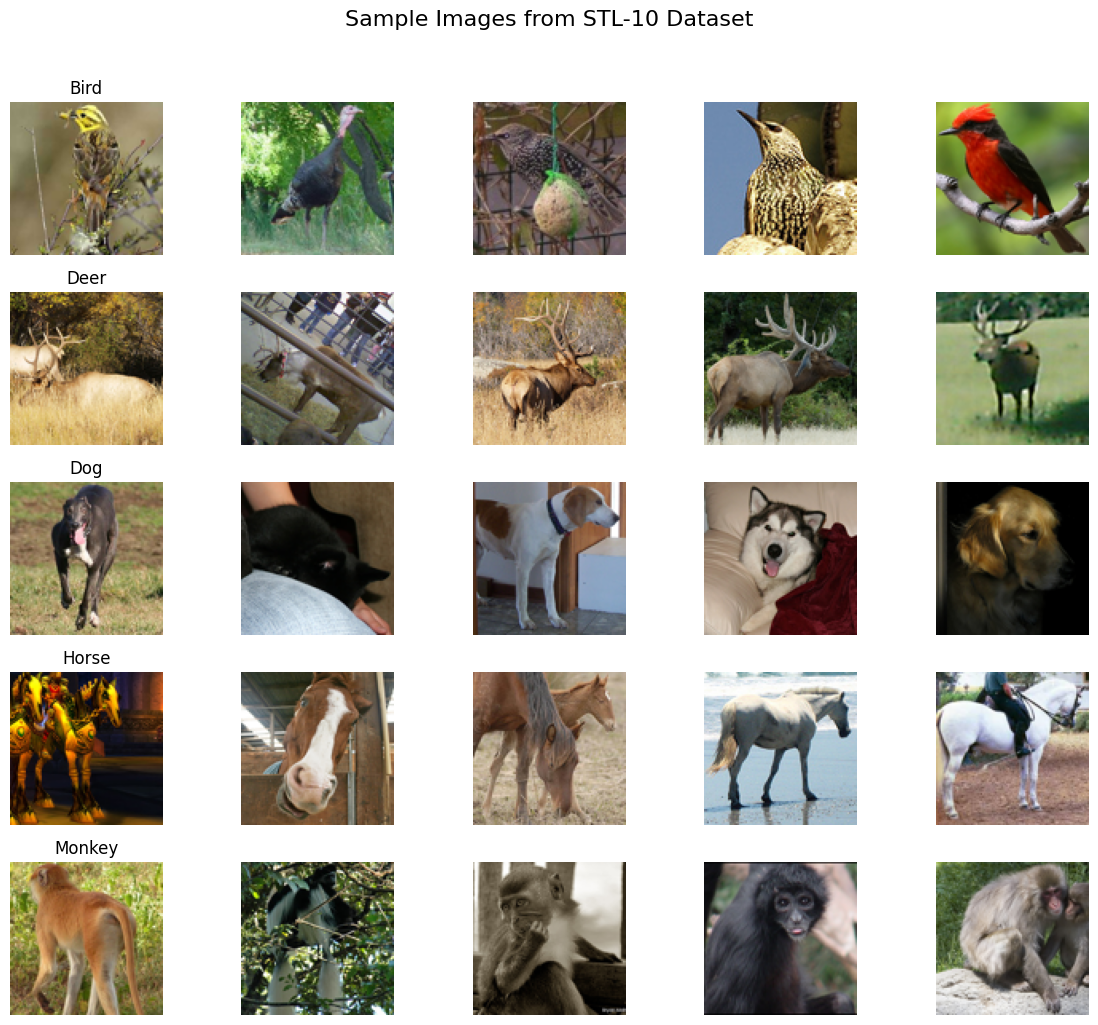

In [31]:
# define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, we implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, we move on to fine-tuning the ConvNet on this dataset in the next section.

In [32]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None, download=True):
        '''
        Initializes the STL10 dataset loader for a subset of classes.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
            download (bool): If True, downloads the dataset from the internet.
        '''
        
        # determine split of the dataset to use
        split = 'train' if train else 'test'
        
        # load full STL10 dataset using torchvision
        full_dataset = torchvision.datasets.STL10(root=root, split=split, download=download)
        self.transform = transform
        target_classes_indices = [1, 4, 5, 6, 7] # bird, deer, dog, horse, monkey (indices we are interested in)
        self.label_map = {original_label: new_label for new_label, original_label in enumerate(target_classes_indices)}
        
        self.data = []
        self.labels = []
        # iterate and filter for the target classes
        for img, label in full_dataset:
            if label in target_classes_indices:
                self.data.append(img)
                self.labels.append(self.label_map[label])

    def __len__(self):
        '''
        Returns the number of samples in the filtered dataset.
        '''
        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''
        # get the image (which is a PIL Image) and its new label
        image = self.data[idx]
        label = self.labels[idx]
        
        # apply transformations if they exist
        if self.transform:
            image = self.transform(image)
            
        return image, label

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, we load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. 
Additionally, we visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, we use [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [33]:
num_stl10_classes = 5 

# resize the 96x96 STL-10 images to 32x32 to match the input size of our pre-trained network
# we use the same normalization stats as CIFAR-100
transform_stl10 = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5071, 0.4867, 0.4408), (0.2675, 0.2565, 0.2761)) # taken from CIFAR-100 (mean stats)
])

# create data loaders
train_set_stl10 = STL10_loader('./data', train=True, transform=transform_stl10, download=False)
test_set_stl10 = STL10_loader('./data', train=False, transform=transform_stl10, download=False)
train_loader_stl10 = DataLoader(train_set_stl10, batch_size=64, shuffle=True, num_workers=0)
test_loader_stl10 = DataLoader(test_set_stl10, batch_size=64, shuffle=False, num_workers=0)

print(f"Number of training images: {len(train_set_stl10)}")
print(f"Number of test images: {len(test_set_stl10)}")

Number of training images: 2500
Number of test images: 4000


In [51]:
model_ft = ImprovedConvNet()
model_ft.load_state_dict(torch.load('improved_conv_net_100epochs.pth'))
# freeze the convolutional layers 
# we do this because the features learned on CIFAR-100 (edges, textures, etc.)
# are useful for the new STL-10 classes. We only need to retrain the classifier part.
for param in model_ft.conv_block1.parameters():
    param.requires_grad = False
for param in model_ft.conv_block2.parameters():
    param.requires_grad = False

# tried with unfreezing the second conv block layer, but it doesn't help much
# could be because of the small amount of data (TODO: try data augmentation in section 10)

# replace final layer
num_ftrs = model_ft.fc_block[7].in_features
model_ft.fc_block[7] = nn.Linear(num_ftrs, num_stl10_classes)

# check the model summary to confirm the changes
summary(model_ft, input_size=(64, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ImprovedConvNet                          [64, 5]                   --
├─Sequential: 1-1                        [64, 64, 16, 16]          --
│    └─Conv2d: 2-1                       [64, 32, 32, 32]          (896)
│    └─BatchNorm2d: 2-2                  [64, 32, 32, 32]          (64)
│    └─ReLU: 2-3                         [64, 32, 32, 32]          --
│    └─Conv2d: 2-4                       [64, 64, 32, 32]          (18,496)
│    └─BatchNorm2d: 2-5                  [64, 64, 32, 32]          (128)
│    └─ReLU: 2-6                         [64, 64, 32, 32]          --
│    └─MaxPool2d: 2-7                    [64, 64, 16, 16]          --
├─Sequential: 1-2                        [64, 128, 8, 8]           --
│    └─Conv2d: 2-8                       [64, 128, 16, 16]         (73,856)
│    └─BatchNorm2d: 2-9                  [64, 128, 16, 16]         (256)
│    └─ReLU: 2-10                        [64, 128, 16, 16]    

Accuracy of the network on the test images: 67.33 %
Epoch 1/50 | Train Loss: 1.2785 | Val Acc: 67.33%
Accuracy of the network on the test images: 71.12 %
Epoch 2/50 | Train Loss: 0.8060 | Val Acc: 71.12%
Accuracy of the network on the test images: 73.25 %
Epoch 3/50 | Train Loss: 0.5629 | Val Acc: 73.25%
Accuracy of the network on the test images: 71.08 %
Epoch 4/50 | Train Loss: 0.3377 | Val Acc: 71.08%
Accuracy of the network on the test images: 73.22 %
Epoch 5/50 | Train Loss: 0.2262 | Val Acc: 73.22%
Accuracy of the network on the test images: 74.38 %
Epoch 6/50 | Train Loss: 0.1656 | Val Acc: 74.38%
Accuracy of the network on the test images: 73.08 %
Epoch 7/50 | Train Loss: 0.1291 | Val Acc: 73.08%
Accuracy of the network on the test images: 71.85 %
Epoch 8/50 | Train Loss: 0.0932 | Val Acc: 71.85%
Accuracy of the network on the test images: 74.75 %
Epoch 9/50 | Train Loss: 0.0552 | Val Acc: 74.75%
Accuracy of the network on the test images: 74.67 %
Epoch 10/50 | Train Loss: 0.04

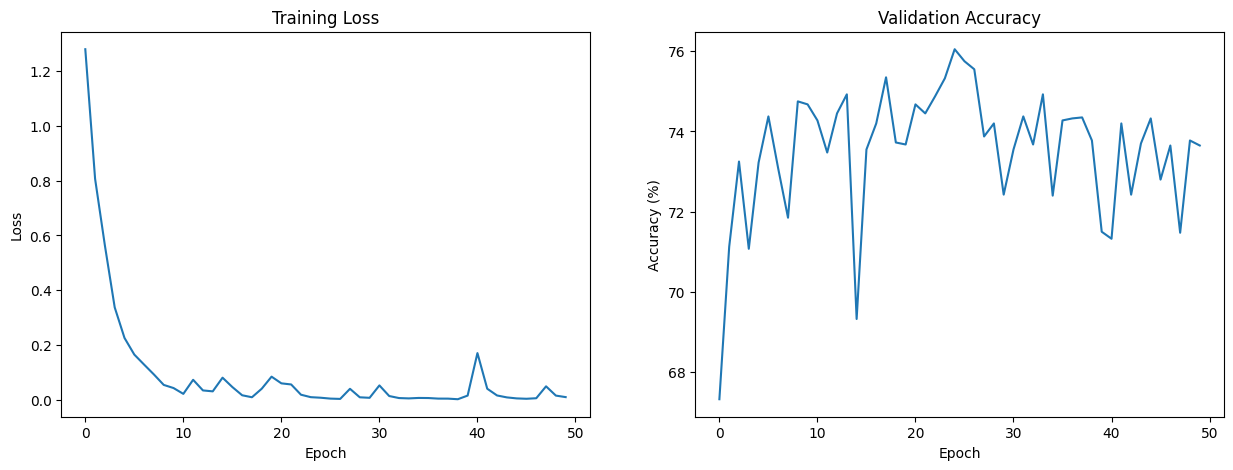

In [52]:
# finetuning
learning_rate_ft = 0.0005
weight_decay_ft = 1e-4
epochs_ft = 50
criterion_ft = nn.CrossEntropyLoss()

# filter the parameters to ensure training only the new classifier head
params_to_update = filter(lambda p: p.requires_grad, model_ft.parameters())
optimizer_ft = optim.Adam(params_to_update, lr=learning_rate_ft, weight_decay=weight_decay_ft)

history_ft = train_and_plot(model_ft, train_loader_stl10, test_loader_stl10, 
                            criterion_ft, optimizer_ft, epochs=epochs_ft)

# best model saved in ImprovedConvNet_best_stl10.pth

In [53]:
model_ft.to(device)
model_ft.eval()
final_stl10_accuracy = validate(model_ft, test_loader_stl10, device)
print(f"The final accuracy of the fine-tuned model on the STL-10 test set is: {final_stl10_accuracy:.2f}%")

Accuracy of the network on the test images: 73.65 %
The final accuracy of the fine-tuned model on the STL-10 test set is: 73.65%


In [54]:
stl10_class_names = ['bird', 'deer', 'dog', 'horse', 'monkey']

validate_per_class(model_ft, test_loader_stl10, stl10_class_names, device)

Accuracy of bird  : 79.88 %
Accuracy of deer  : 78.62 %
Accuracy of dog   : 66.88 %
Accuracy of horse : 70.12 %
Accuracy of monkey : 72.75 %


#### Analysis of Fine-Tuning Results

Our initial fine-tuning experiment, where we froze the convolutional base and trained only the classifier head, achieved a best validation accuracy of **76.20%%**. While this is an improvement over the CIFAR-100 task, the learning curves reveal some issues:

1.  **Overfitting:** The training loss dops quite immediately to from 1.27 to 0.80. The validation accuracy is also unstable and fails to improve consistently. This looks like a sign of overfitting. Due to the pretraining on the CIFAR-100 dataset, the model has memorized the training data rather than learning generalisable features. 
2.  **Limited Feature Adaptation:** Since we freeze the convolution base, the model is unable to adapt to the higher level feature detectors to the specifics of the new dataset. 

TODO: To achieve a better result, we could try experiment with unfreezing some of the convolution block layers. 

In [55]:
from sklearn.manifold import TSNE
import seaborn as sns
import copy 

def get_features(model, dataloader, device):
    """
    Extracts features from the second-to-last layer of the model.
    This version is corrected to produce a 2D feature matrix.
    """
    
    # deep copy of the model to avoid updating the original fine-tuned model
    feature_extractor = copy.deepcopy(model)
    
    # replace final classification layer with an Identity layer.
    # the identity layer passes the input through, so the output of this new model will be the input to the original final layer.
    feature_extractor.fc_block[7] = nn.Identity()
    feature_extractor.to(device)
    feature_extractor.eval()
    
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            # shape: [batch_size, 256]
            features = feature_extractor(images)
            all_features.append(features.cpu().numpy())
            all_labels.append(labels.cpu().numpy())

    # concatenate all batches
    # shape [total_samples, 256]
    return np.concatenate(all_features), np.concatenate(all_labels)

def plot_tsne(features, labels, title):
    """Runs t-SNE and plots the results."""
    print(f"Running t-SNE for '{title}'...")
    tsne = TSNE(n_components=2, perplexity=30, max_iter=300, random_state=42)
    tsne_results = tsne.fit_transform(features)
    
    class_names = ['bird', 'deer', 'dog', 'horse', 'monkey']
    mapped_labels = [class_names[l] for l in labels]

    plt.figure(figsize=(10, 8))
    sns.scatterplot(
        x=tsne_results[:,0], y=tsne_results[:,1],
        hue=mapped_labels,
        palette=sns.color_palette("hls", 5), # 5 classes
        legend="full",
        alpha=0.8
    )
    plt.title(title, fontsize=16)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.show()


Running t-SNE for 't-SNE of Features After Fine-Tuning'...


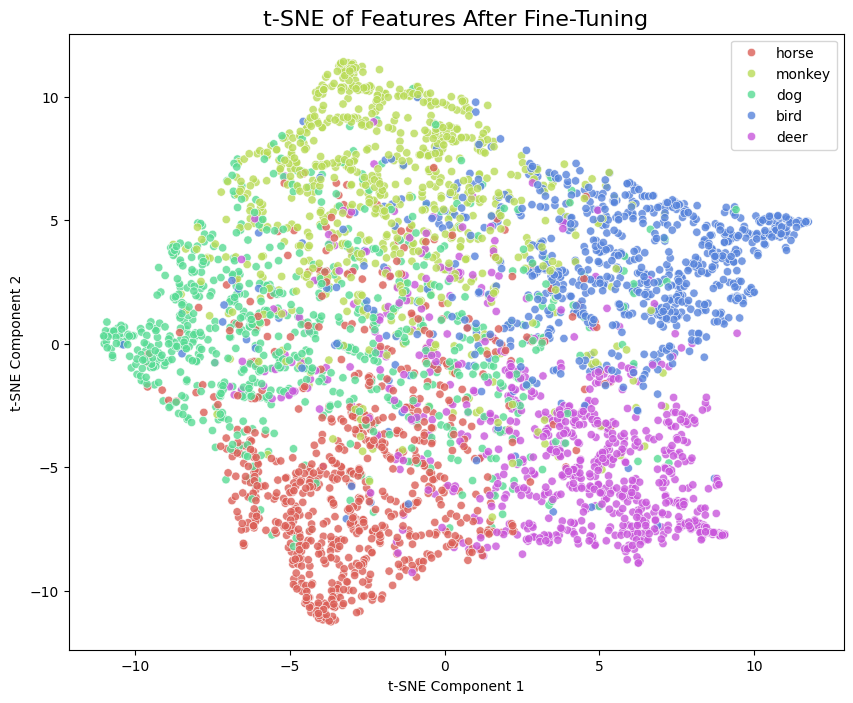

In [56]:
if torch.cuda.is_available(): device = torch.device("cuda")
elif torch.backends.mps.is_available(): device = torch.device("mps")
else: device = torch.device("cpu")


features_after, labels_after = get_features(model_ft, test_loader_stl10, device)
plot_tsne(features_after, labels_after, "t-SNE of Features After Fine-Tuning")

### t-SNE Visualization Analysis

The t-SNE plot of the feature space provides a clear visual diagnosis that matches our 76% validation accuracy.

*   **Partial Cluster Formation:** We can see that the model learned some separable structure since the classes are not randomly mixed. We can identify rough regions corresponding to each of the five classes. 
*   **Significant Overlap:** There is substantial over between cluster, particularly for similar looking animals like horse, deer and dog.

  
The points in these overlapping regions represent images that the model struggles to differentiate, which accounts for the ~25% error rate.